In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.metrics import AUC
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [6]:
from google.colab import files
uploaded = files.upload()

Saving Occupancy_Estimation.csv to Occupancy_Estimation.csv


In [7]:
import io
data = pd.read_csv(io.BytesIO(uploaded['Occupancy_Estimation.csv']))

In [8]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,S1_Sound,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,0.08,0.19,0.06,0.06,390,0.769231,0,0,1
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,0.93,0.05,0.06,0.06,390,0.646154,0,0,1
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,0.43,0.11,0.08,0.06,390,0.519231,0,0,1
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,0.41,0.10,0.10,0.09,390,0.388462,0,0,1
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,0.18,0.06,0.06,0.06,390,0.253846,0,0,1


In [9]:
data['temp'] = (data['S1_Temp']+data['S2_Temp']+data['S3_Temp']+data['S4_Temp'])/4
data['light'] = (data['S1_Light']+data['S2_Light']+data['S3_Light']+data['S4_Light'])/4

In [10]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.19,0.06,0.06,390,0.769231,0,0,1,24.9075,62.00
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.05,0.06,0.06,390,0.646154,0,0,1,24.9225,61.75
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.11,0.08,0.06,390,0.519231,0,0,1,24.9225,62.00
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.10,0.10,0.09,390,0.388462,0,0,1,24.9375,62.00
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,0.06,0.06,390,0.253846,0,0,1,24.9375,62.25


In [11]:
# or_operation = lambda row: row[selected_columns[0]] | row[selected_columns[1]]
# selected_columns = [data['S6_PIR'],data['S7_PIR']]
# data['PIR'] = data.apply(or_operation, axis=1)

In [12]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S2_Sound,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.19,0.06,0.06,390,0.769231,0,0,1,24.9075,62.00
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.05,0.06,0.06,390,0.646154,0,0,1,24.9225,61.75
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.11,0.08,0.06,390,0.519231,0,0,1,24.9225,62.00
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.10,0.10,0.09,390,0.388462,0,0,1,24.9375,62.00
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,0.06,0.06,390,0.253846,0,0,1,24.9375,62.25


In [13]:
data['pir'] = (data['S6_PIR']) | (data['S7_PIR'])

In [14]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light,pir
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.06,0.06,390,0.769231,0,0,1,24.9075,62.00,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.06,0.06,390,0.646154,0,0,1,24.9225,61.75,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.08,0.06,390,0.519231,0,0,1,24.9225,62.00,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.10,0.09,390,0.388462,0,0,1,24.9375,62.00,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,0.06,390,0.253846,0,0,1,24.9375,62.25,0


In [15]:
data.tail()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light,pir
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,...,0.06,0.08,345,0.0,0,0,0,25.0475,17.00,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,...,0.05,0.08,345,0.0,0,0,0,25.0150,17.25,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,...,0.06,0.08,345,0.0,0,0,0,25.0325,17.25,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,...,0.10,0.08,345,0.0,0,0,0,25.0325,17.25,0
10128,2018/01/11,09:00:09,25.13,25.06,24.69,25.25,6,7,34,22,...,0.06,0.08,345,0.0,0,0,0,25.0325,17.25,0


In [16]:
data

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light,pir
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.06,0.06,390,0.769231,0,0,1,24.9075,62.00,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.06,0.06,390,0.646154,0,0,1,24.9225,61.75,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.08,0.06,390,0.519231,0,0,1,24.9225,62.00,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.10,0.09,390,0.388462,0,0,1,24.9375,62.00,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,0.06,390,0.253846,0,0,1,24.9375,62.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10124,2018/01/11,08:58:07,25.06,25.13,24.69,25.31,6,7,33,22,...,0.06,0.08,345,0.000000,0,0,0,25.0475,17.00,0
10125,2018/01/11,08:58:37,25.06,25.06,24.69,25.25,6,7,34,22,...,0.05,0.08,345,0.000000,0,0,0,25.0150,17.25,0
10126,2018/01/11,08:59:08,25.13,25.06,24.69,25.25,6,7,34,22,...,0.06,0.08,345,0.000000,0,0,0,25.0325,17.25,0
10127,2018/01/11,08:59:39,25.13,25.06,24.69,25.25,6,7,34,22,...,0.10,0.08,345,0.000000,0,0,0,25.0325,17.25,0


In [17]:
data.head(300)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light,pir
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.06,0.06,390,0.769231,0,0,1,24.9075,62.00,0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.06,0.06,390,0.646154,0,0,1,24.9225,61.75,0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.08,0.06,390,0.519231,0,0,1,24.9225,62.00,0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.10,0.09,390,0.388462,0,0,1,24.9375,62.00,0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,0.06,390,0.253846,0,0,1,24.9375,62.25,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,2017/12/22,13:49:25,26.06,27.06,26.00,26.38,164,254,276,70,...,0.64,0.08,910,1.661538,1,1,3,26.3750,191.00,1
296,2017/12/22,13:49:55,26.06,27.00,26.00,26.31,165,254,275,70,...,0.62,0.14,910,1.553846,1,1,3,26.3425,191.00,1
297,2017/12/22,13:50:26,26.06,27.00,26.00,26.31,164,254,274,70,...,0.22,0.11,910,1.446154,1,1,3,26.3425,190.50,1
298,2017/12/22,13:50:56,26.13,27.06,26.00,26.31,165,254,274,71,...,1.51,1.36,910,1.392308,1,1,3,26.3750,191.00,1


In [18]:
data.iloc[200:250]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S3_Sound,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light,pir
200,2017/12/22,12:34:52,25.75,28.69,25.31,26.06,159,245,216,65,...,0.19,0.13,665,0.707692,1,0,2,26.4525,171.25,1
201,2017/12/22,12:35:22,25.75,28.63,25.31,26.06,160,244,216,65,...,0.19,0.22,665,0.880769,1,1,2,26.4375,171.25,1
202,2017/12/22,12:35:53,25.81,28.81,25.31,26.06,160,244,223,67,...,3.63,0.43,670,1.038462,1,1,3,26.4975,173.50,1
203,2017/12/22,12:36:24,25.81,28.75,25.31,26.06,160,244,225,68,...,1.32,0.26,680,1.319231,1,1,3,26.4825,174.25,1
204,2017/12/22,12:36:54,25.81,28.88,25.31,26.06,160,244,224,67,...,1.61,0.36,675,1.430769,1,1,3,26.5150,173.75,1
205,2017/12/22,12:37:25,25.81,28.81,25.38,26.06,160,244,224,67,...,0.96,0.65,675,1.515385,1,1,3,26.5150,173.75,1
206,2017/12/22,12:37:56,25.81,28.81,25.38,26.13,160,243,215,66,...,3.64,3.40,675,1.623077,1,1,3,26.5325,171.00,1
207,2017/12/22,12:38:26,25.81,28.94,25.38,26.13,160,243,223,65,...,3.65,1.03,675,1.707692,1,1,3,26.5650,172.75,1
208,2017/12/22,12:38:57,25.81,28.94,25.31,26.13,160,243,222,66,...,0.25,0.28,685,1.811538,1,1,3,26.5475,172.75,1
209,2017/12/22,12:39:28,25.81,28.94,25.38,26.13,159,243,222,66,...,3.65,0.27,690,1.976923,1,1,3,26.5650,172.50,1


In [19]:
data['room_occupancy_rate'] = (data['Room_Occupancy_Count'])/(6*4.6)

In [20]:
data.iloc[250:280]

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light,pir,room_occupancy_rate
250,2017/12/22,13:25:55,26.00,27.94,25.81,26.19,164,252,268,70,...,0.06,865,0.915385,0,0,3,26.4850,188.50,0,0.108696
251,2017/12/22,13:26:26,26.00,27.81,25.81,26.19,163,252,268,70,...,0.06,865,0.930769,1,0,3,26.4525,188.25,1,0.108696
252,2017/12/22,13:26:57,26.00,27.81,25.81,26.19,164,252,268,70,...,0.06,865,0.976923,1,0,3,26.4525,188.50,1,0.108696
253,2017/12/22,13:27:27,26.00,27.75,25.81,26.19,163,252,266,69,...,0.09,875,1.100000,0,0,3,26.4375,187.50,0,0.108696
254,2017/12/22,13:27:58,26.00,27.69,25.81,26.19,163,252,267,70,...,0.07,880,1.246154,0,0,3,26.4225,188.00,0,0.108696
255,2017/12/22,13:28:28,26.00,27.75,25.81,26.25,164,251,267,70,...,0.09,875,1.319231,0,1,3,26.4525,188.00,1,0.108696
256,2017/12/22,13:28:59,26.00,27.75,25.81,26.25,162,247,254,69,...,0.75,880,1.365385,1,1,3,26.4525,183.00,1,0.108696
257,2017/12/22,13:29:30,26.00,27.63,25.88,26.25,163,253,268,70,...,0.43,885,1.426923,1,1,2,26.4400,188.50,1,0.072464
258,2017/12/22,13:30:00,26.00,27.63,25.88,26.19,164,253,269,70,...,0.29,885,1.503846,1,1,2,26.4250,189.00,1,0.072464
259,2017/12/22,13:30:31,26.00,27.63,25.88,26.25,165,254,270,71,...,0.33,875,1.507692,1,1,2,26.4400,190.00,1,0.072464


In [21]:
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light,pir,room_occupancy_rate
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.06,390,0.769231,0,0,1,24.9075,62.00,0,0.036232
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.06,390,0.646154,0,0,1,24.9225,61.75,0,0.036232
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.06,390,0.519231,0,0,1,24.9225,62.00,0,0.036232
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.09,390,0.388462,0,0,1,24.9375,62.00,0,0.036232
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,390,0.253846,0,0,1,24.9375,62.25,0,0.036232


In [22]:
data['room_occupancy_rate'] = np.where(data['room_occupancy_rate'] > 0.08, 'high', (np.where(data['room_occupancy_rate']> 0.05, 'medium', (np.where(data['room_occupancy_rate']>0.009, 'low', 'none')))))

data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S4_Sound,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light,pir,room_occupancy_rate
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,0.06,390,0.769231,0,0,1,24.9075,62.00,0,low
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,0.06,390,0.646154,0,0,1,24.9225,61.75,0,low
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,0.06,390,0.519231,0,0,1,24.9225,62.00,0,low
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,0.09,390,0.388462,0,0,1,24.9375,62.00,0,low
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,0.06,390,0.253846,0,0,1,24.9375,62.25,0,low


In [23]:
from keras.utils import to_categorical
data['room_occupancy_rate_int'] = np.where(data['room_occupancy_rate'] == 'high', 0, (np.where(data['room_occupancy_rate']== 'medium', 1, (np.where(data['room_occupancy_rate'] == 'low' ,2,3)))))
data.head()

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,S5_CO2,S5_CO2_Slope,S6_PIR,S7_PIR,Room_Occupancy_Count,temp,light,pir,room_occupancy_rate,room_occupancy_rate_int
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,390,0.769231,0,0,1,24.9075,62.00,0,low,2
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,390,0.646154,0,0,1,24.9225,61.75,0,low,2
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,390,0.519231,0,0,1,24.9225,62.00,0,low,2
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,390,0.388462,0,0,1,24.9375,62.00,0,low,2
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,390,0.253846,0,0,1,24.9375,62.25,0,low,2


In [24]:
temp = np.array(data['room_occupancy_rate_int'].values.reshape(1,-1)[0])
print(temp)
room_occupancy_rate_one_hot= to_categorical(temp)
# print(np.array(data['room_occupancy_rate_int'].values))
one_hot_encoded_df = pd.DataFrame(room_occupancy_rate_one_hot, columns=['high','medium','low','none'])
print(one_hot_encoded_df)

[2 2 2 ... 3 3 3]
       high  medium  low  none
0       0.0     0.0  1.0   0.0
1       0.0     0.0  1.0   0.0
2       0.0     0.0  1.0   0.0
3       0.0     0.0  1.0   0.0
4       0.0     0.0  1.0   0.0
...     ...     ...  ...   ...
10124   0.0     0.0  0.0   1.0
10125   0.0     0.0  0.0   1.0
10126   0.0     0.0  0.0   1.0
10127   0.0     0.0  0.0   1.0
10128   0.0     0.0  0.0   1.0

[10129 rows x 4 columns]


In [25]:
df = pd.concat([data, one_hot_encoded_df], axis=1)
df.head(10)

,Date,Time,S1_Temp,S2_Temp,S3_Temp,S4_Temp,S1_Light,S2_Light,S3_Light,S4_Light,...,Room_Occupancy_Count,temp,light,pir,room_occupancy_rate,room_occupancy_rate_int,high,medium,low,none
0,2017/12/22,10:49:41,24.94,24.75,24.56,25.38,121,34,53,40,...,1,24.9075,62.00,0,low,2,0.0,0.0,1.0,0.0
1,2017/12/22,10:50:12,24.94,24.75,24.56,25.44,121,33,53,40,...,1,24.9225,61.75,0,low,2,0.0,0.0,1.0,0.0
2,2017/12/22,10:50:42,25.00,24.75,24.50,25.44,121,34,53,40,...,1,24.9225,62.00,0,low,2,0.0,0.0,1.0,0.0
3,2017/12/22,10:51:13,25.00,24.75,24.56,25.44,121,34,53,40,...,1,24.9375,62.00,0,low,2,0.0,0.0,1.0,0.0
4,2017/12/22,10:51:44,25.00,24.75,24.56,25.44,121,34,54,40,...,1,24.9375,62.25,0,low,2,0.0,0.0,1.0,0.0
5,2017/12/22,10:52:14,25.00,24.81,24.56,25.44,121,34,54,40,...,1,24.9525,62.25,0,low,2,0.0,0.0,1.0,0.0
6,2017/12/22,10:52:45,25.00,24.75,24.56,25.44,120,34,54,40,...,1,24.9375,62.00,1,low,2,0.0,0.0,1.0,0.0
7,2017/12/22,10:53:15,25.00,24.81,24.56,25.44,121,34,54,41,...,1,24.9525,62.50,0,low,2,0.0,0.0,1.0,0.0
8,2017/12/22,10:53:46,25.00,24.81,24.56,25.50,122,35,56,43,...,1,24.9675,64.00,0,low,2,0.0,0.0,1.0,0.0
9,2017/12/22,10:54:17,25.00,24.81,24.56,25.50,101,34,57,43,...,1,24.9675,58.75,1,low,2,0.0,0.0,1.0,0.0


In [26]:
cols_to_use = ['temp', 'light','S5_CO2','pir','high', 'medium', 'low','none']

df = df[cols_to_use]

df.head()

,temp,light,S5_CO2,pir,high,medium,low,none
0,24.9075,62.00,390,0,0.0,0.0,1.0,0.0
1,24.9225,61.75,390,0,0.0,0.0,1.0,0.0
2,24.9225,62.00,390,0,0.0,0.0,1.0,0.0
3,24.9375,62.00,390,0,0.0,0.0,1.0,0.0
4,24.9375,62.25,390,0,0.0,0.0,1.0,0.0


In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Date                     10129 non-null  object 
 1   Time                     10129 non-null  object 
 2   S1_Temp                  10129 non-null  float64
 3   S2_Temp                  10129 non-null  float64
 4   S3_Temp                  10129 non-null  float64
 5   S4_Temp                  10129 non-null  float64
 6   S1_Light                 10129 non-null  int64  
 7   S2_Light                 10129 non-null  int64  
 8   S3_Light                 10129 non-null  int64  
 9   S4_Light                 10129 non-null  int64  
 10  S1_Sound                 10129 non-null  float64
 11  S2_Sound                 10129 non-null  float64
 12  S3_Sound                 10129 non-null  float64
 13  S4_Sound                 10129 non-null  float64
 14  S5_CO2                

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10129 entries, 0 to 10128
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   temp    10129 non-null  float64
 1   light   10129 non-null  float64
 2   S5_CO2  10129 non-null  int64  
 3   pir     10129 non-null  int64  
 4   high    10129 non-null  float32
 5   medium  10129 non-null  float32
 6   low     10129 non-null  float32
 7   none    10129 non-null  float32
dtypes: float32(4), float64(2), int64(2)
memory usage: 474.9 KB


In [29]:
df['co2'] = df['S5_CO2']
df.head()

,temp,light,S5_CO2,pir,high,medium,low,none,co2
0,24.9075,62.00,390,0,0.0,0.0,1.0,0.0,390
1,24.9225,61.75,390,0,0.0,0.0,1.0,0.0,390
2,24.9225,62.00,390,0,0.0,0.0,1.0,0.0,390
3,24.9375,62.00,390,0,0.0,0.0,1.0,0.0,390
4,24.9375,62.25,390,0,0.0,0.0,1.0,0.0,390


In [30]:
df.head()

,temp,light,S5_CO2,pir,high,medium,low,none,co2
0,24.9075,62.00,390,0,0.0,0.0,1.0,0.0,390
1,24.9225,61.75,390,0,0.0,0.0,1.0,0.0,390
2,24.9225,62.00,390,0,0.0,0.0,1.0,0.0,390
3,24.9375,62.00,390,0,0.0,0.0,1.0,0.0,390
4,24.9375,62.25,390,0,0.0,0.0,1.0,0.0,390


In [73]:
# Y = df['high','medium','low']
X = df.drop(['high','medium','low','none'], axis=1)


In [74]:
Y = df.drop(['temp','light','pir','co2','S5_CO2'], axis=1)

In [71]:
X.describe()

,temp,light,pir,co2
count,10129.000000,10129.000000,10129.000000,10129.000000
mean,25.452704,24.732525,0.118274,460.860401
std,0.399201,43.811460,0.322949,199.964940
min,24.890000,0.000000,0.000000,345.000000
25%,25.127500,0.000000,0.000000,355.000000
50%,25.362500,0.000000,0.000000,360.000000
75%,25.612500,30.500000,0.000000,465.000000
max,26.800000,193.750000,1.000000,1270.000000


In [42]:
Y.describe()

,high,medium,low,none
count,10129.000000,10129.000000,10129.000000,10129.000000
mean,0.068516,0.073847,0.045315,0.812321
std,0.252642,0.261535,0.208005,0.390475
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,0.000000,1.000000
75%,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000


In [ ]:
Y.iloc[1000:1100]

In [ ]:
pd.options.display.max_rows = 100
df

In [ ]:
Y.head()

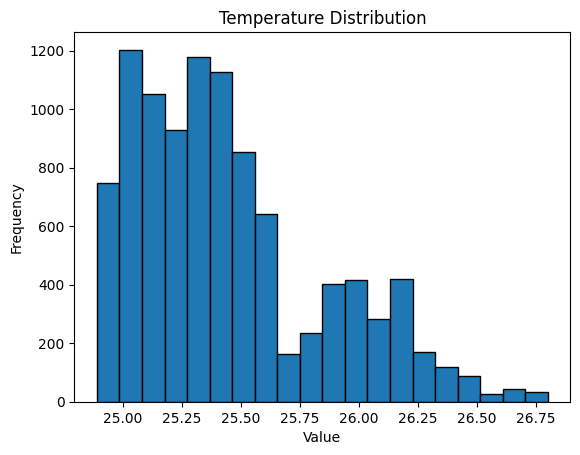

In [58]:
plt.hist(X['temp'], bins=20, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Temperature Distribution')

plt.show()


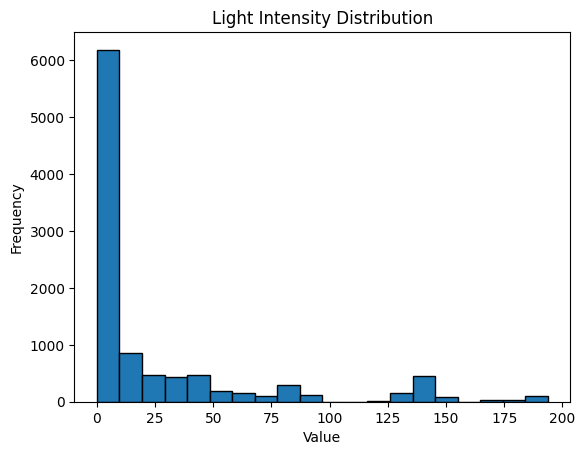

In [47]:
plt.hist(X['light'], bins=20, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Light Intensity Distribution')

plt.show()

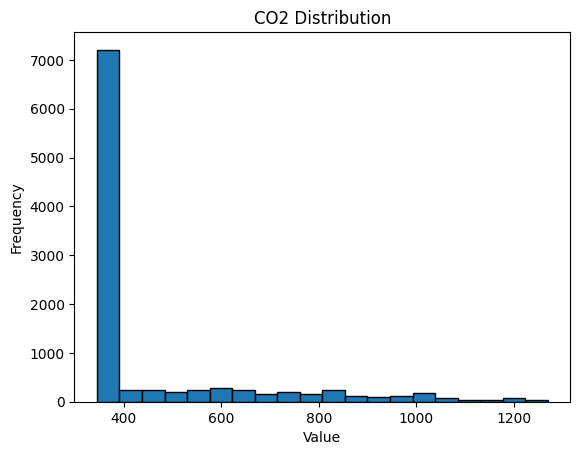

In [48]:
plt.hist(X['co2'], bins=20, edgecolor='black')

plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('CO2 Distribution')

plt.show()

<Figure size 1000x1000 with 0 Axes>

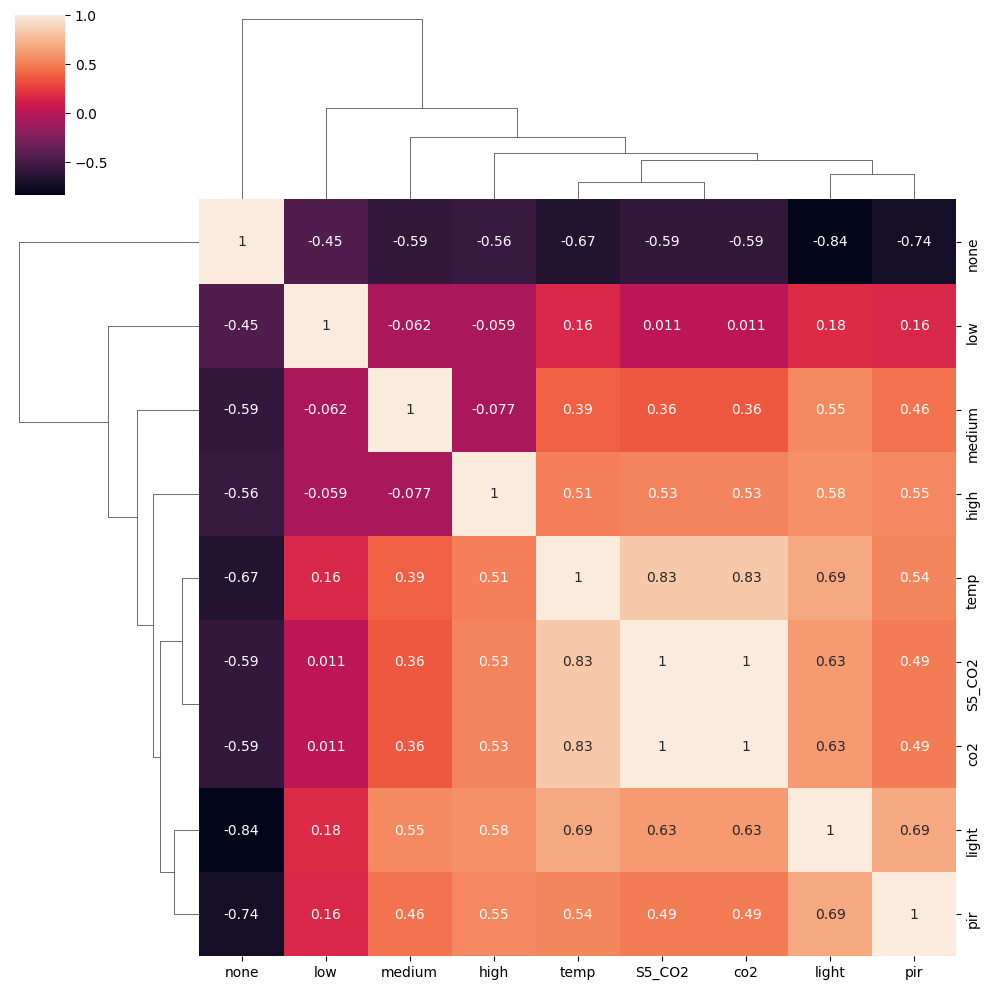

In [49]:
plt.figure(figsize = (10,10))
sns.clustermap(df.corr(), annot = True)

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [76]:
model = Sequential([
                    Dense(200, activation = "swish", input_shape = (X.shape[1],)),
                    Dropout(0.5),
                    Dense(100, activation = "swish"),
                    Dropout(0.5),
                    Dense(50,activation = "swish"),
                    Dropout(0.5),
                    Dense(4, activation = "softmax")
])

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 200)               1200      
                                                                 
 dropout_9 (Dropout)         (None, 200)               0         
                                                                 
 dense_13 (Dense)            (None, 100)               20100     
                                                                 
 dropout_10 (Dropout)        (None, 100)               0         
                                                                 
 dense_14 (Dense)            (None, 50)                5050      
                                                                 
 dropout_11 (Dropout)        (None, 50)                0         
                                                                 
 dense_15 (Dense)            (None, 4)                

In [77]:
model.compile(optimizer = "adam",
              loss = "categorical_crossentropy",
              metrics = AUC())

In [78]:
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
254/254 [==============================] - 3s 8ms/step - loss: 12.6776 - auc_3: 0.7607 - val_loss: 0.8082 - val_auc_3: 0.9304
Epoch 2/10
254/254 [==============================] - 1s 4ms/step - loss: 1.3411 - auc_3: 0.8499 - val_loss: 0.8414 - val_auc_3: 0.8408
Epoch 3/10
254/254 [==============================] - 1s 3ms/step - loss: 0.8103 - auc_3: 0.8894 - val_loss: 0.7305 - val_auc_3: 0.8761
Epoch 4/10
254/254 [==============================] - 1s 4ms/step - loss: 0.7214 - auc_3: 0.8927 - val_loss: 0.7193 - val_auc_3: 0.8741
Epoch 5/10
254/254 [==============================] - 1s 4ms/step - loss: 0.6994 - auc_3: 0.8925 - val_loss: 0.7191 - val_auc_3: 0.8761
Epoch 6/10
254/254 [==============================] - 1s 4ms/step - loss: 0.6793 - auc_3: 0.8960 - val_loss: 0.7059 - val_auc_3: 0.8825
Epoch 7/10
254/254 [==============================] - 1s 4ms/step - loss: 0.6802 - auc_3: 0.8986 - val_loss: 0.6684 - val_auc_3: 0.8913
Epoch 8/10
254/254 [===========================

In [55]:
history

In [79]:
X.head()

,temp,light,S5_CO2,pir,co2
0,24.9075,62.00,390,0,390
1,24.9225,61.75,390,0,390
2,24.9225,62.00,390,0,390
3,24.9375,62.00,390,0,390
4,24.9375,62.25,390,0,390


In [83]:
prediction = model.predict([[24, 70, 500, 1, 500]])

1/1 [==============================] - 0s 41ms/step


In [84]:
print(prediction)

[[0.16488461 0.24064535 0.1501614  0.4443086 ]]


In [85]:
import pickle

with open('model_pkl', 'wb') as files:
    pickle.dump(model, files)

In [86]:
from google.colab import files

files.download('model_pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>